# Curriculum Learning

In [1]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import matplotlib.pyplot as plt
import pickle
import config
import torch
from tqdm.notebook import tqdm
from copy import copy, deepcopy
import cmath
import chess
from utils import saver, loader

from agents import *
from environments import *
from models import *
%matplotlib inline

np.set_printoptions(precision = 3)

print("PyTorch version:", torch.__version__)  
print("CUDA toolkit version PyTorch was built with:", torch.version.cuda)  
print("cuDNN version:", torch.backends.cudnn.version()) 
print("cuda available:", torch.cuda.is_available())

torch.set_float32_matmul_precision('high')

PyTorch version: 2.7.1+cu128
CUDA toolkit version PyTorch was built with: 12.8
cuDNN version: 90701
cuda available: True


In [2]:
torch.manual_seed(42)
random.seed(42)
logger = Logger(sample_freq = 1000)

agent = Agent(board_logic = BoardLogic())


opt_list = [torch.optim.Adam(agent.online_net1.parameters(), lr=1e-4), 
            torch.optim.Adam(agent.online_net2.parameters(), lr=1e-4)]

model = Model(agent = agent,
               environment = Environment(max_num_moves=200,),
               mem_capacity = 500000,
               batch_size = 512,
               policy_update = 10,
               target_update = 10000,
               temp_constants = (0.5, 0.1, 0.00, 5000),
               opt_list=opt_list,
               scaler=torch.amp.GradScaler("cuda")
             )

In [3]:
model.train(num_episodes = 20000, logger = logger)
save_checkpoint(model, filename="model_20000_episodes.pth")

  0%|          | 0/20000 [00:00<?, ?it/s]

1 checkmate! 126 eps: 0.320, diff: 0.970
0
2 draw! 199 eps: 0.169, diff: 0.928
3 draw! 199 eps: 0.190, diff: 0.891
4 draw! 199 eps: 0.009, diff: 0.949
5 draw! 199 eps: 0.466, diff: 0.859
6 checkmate! 46 eps: 0.190, diff: 1.721
7 checkmate! 157 eps: 0.422, diff: 1.051
8 draw! 199 eps: 0.415, diff: 1.093
9 checkmate! 51 eps: 0.047, diff: 0.932
10 draw! 199 eps: 0.381, diff: 0.849
11 checkmate! 101 eps: 0.101, diff: 1.046
12 checkmate! 160 eps: 0.424, diff: 0.818
13 draw! 199 eps: 0.298, diff: 1.120
14 checkmate! 41 eps: 0.413, diff: 0.930
15 checkmate! 88 eps: 0.377, diff: 1.071
16 checkmate! 59 eps: 0.360, diff: 0.989
17 draw! 199 eps: 0.046, diff: 0.974
18 draw! 199 eps: 0.209, diff: 0.963
19 draw! 199 eps: 0.339, diff: 0.849
20 draw! 199 eps: 0.009, diff: 1.028
21 checkmate! 174 eps: 0.083, diff: 0.945
22 checkmate! 86 eps: 0.105, diff: 0.872
23 checkmate! 65 eps: 0.212, diff: 0.723
24 checkmate! 106 eps: 0.113, diff: 0.969
25 draw! 199 eps: 0.067, diff: 1.065
26 draw! 199 eps: 0.267,

In [4]:
model.train(num_episodes = 20000, logger = logger)
save_checkpoint(model, filename="model_40000_episodes.pth")

  0%|          | 0/20000 [00:00<?, ?it/s]

20001 draw! 199 eps: 0.097, diff: 0.079
tensor(0.0168, device='cuda:0')
20002 draw! 199 eps: 0.079, diff: 0.191
20003 checkmate! 88 eps: 0.020, diff: 0.077
20004 checkmate! 59 eps: 0.041, diff: 0.135
20005 draw! 199 eps: 0.082, diff: 0.135
20006 checkmate! 193 eps: 0.074, diff: 0.057
20007 checkmate! 124 eps: 0.064, diff: 0.062
20008 draw! 199 eps: 0.091, diff: 0.123
20009 checkmate! 153 eps: 0.060, diff: 0.068
20010 checkmate! 172 eps: 0.005, diff: 0.057
20011 checkmate! 124 eps: 0.014, diff: 0.052
20012 checkmate! 52 eps: 0.082, diff: 0.113
20013 draw! 199 eps: 0.034, diff: 0.068
20014 draw! 199 eps: 0.081, diff: 0.061
20015 draw! 199 eps: 0.032, diff: 0.101
20016 checkmate! 35 eps: 0.045, diff: 0.058
20017 draw! 199 eps: 0.016, diff: 0.034
20018 draw! 199 eps: 0.071, diff: 0.120
20019 checkmate! 117 eps: 0.074, diff: 0.048
20020 checkmate! 44 eps: 0.091, diff: 0.057
20021 checkmate! 114 eps: 0.049, diff: 0.071
20022 draw! 199 eps: 0.003, diff: 0.112
20023 draw! 199 eps: 0.015, diff:

In [88]:
model.train(num_episodes = 20000, logger = logger)
save_checkpoint(model, filename="model_60000_episodes.pth")

  0%|          | 0/20000 [00:00<?, ?it/s]

/home/kristian/anaconda3/envs/env_pytorch/lib/python3.12/site-packages/torch/_dynamo/variables/functions.py:1263: UserWarning: Dynamo does not know how to trace the builtin `<unknown module>.Random.random.` This function is either a Python builtin (e.g. _warnings.warn) or a third-party C/C++ Python extension (perhaps created with pybind).
If it is a Python builtin, please file an issue on GitHub so the PyTorch team can add support for it and see the next case for a workaround.
If it is a third-party C/C++ Python extension, please either wrap it into a PyTorch-understood custom operator (see https://pytorch.org/tutorials/advanced/custom_ops_landing_page.html for more details) or, if it is traceable, use `torch.compiler.allow_in_graph`.
  torch._dynamo.utils.warn_once(explanation + "\n" + "\n".join(hints))


40001 draw! 199 eps: 0.090, diff: 0.109
tensor(0.0114, device='cuda:0')
40002 draw! 199 eps: 0.041, diff: 0.070
40003 draw! 199 eps: 0.093, diff: 0.063
40004 checkmate! 27 eps: 0.009, diff: 0.082
40005 draw! 199 eps: 0.054, diff: 0.050
40006 checkmate! 92 eps: 0.036, diff: 0.039
40007 checkmate! 50 eps: 0.075, diff: 0.079
40008 draw! 199 eps: 0.069, diff: 0.062
40009 checkmate! 129 eps: 0.004, diff: 0.103
40010 draw! 199 eps: 0.057, diff: 0.069
40011 draw! 199 eps: 0.074, diff: 0.050
40012 checkmate! 83 eps: 0.097, diff: 0.140
40013 draw! 199 eps: 0.067, diff: 0.051
40014 draw! 199 eps: 0.072, diff: 0.071
40015 checkmate! 194 eps: 0.035, diff: 0.073
40016 checkmate! 150 eps: 0.015, diff: 0.058
40017 draw! 199 eps: 0.032, diff: 0.054
40018 draw! 199 eps: 0.002, diff: 0.059
40019 draw! 199 eps: 0.080, diff: 0.073
40020 checkmate! 15 eps: 0.001, diff: 0.073
40021 checkmate! 28 eps: 0.019, diff: 0.098
40022 checkmate! 176 eps: 0.033, diff: 0.077
40023 draw! 199 eps: 0.049, diff: 0.080
4002

In [272]:
model.train(num_episodes = 20000, logger = logger)
save_checkpoint(model, filename="model_80000_episodes.pth")

  0%|          | 0/20000 [00:00<?, ?it/s]

60001 draw! 199 eps: 0.028, diff: 0.041
tensor(0.0068, device='cuda:0')
60002 checkmate! 79 eps: 0.060, diff: 0.055
60003 draw! 199 eps: 0.066, diff: 0.048
60004 checkmate! 79 eps: 0.083, diff: 0.051
60005 checkmate! 142 eps: 0.003, diff: 0.076
60006 checkmate! 67 eps: 0.020, diff: 0.041
60007 draw! 199 eps: 0.027, diff: 0.042
60008 draw! 199 eps: 0.084, diff: 0.033
60009 checkmate! 102 eps: 0.042, diff: 0.045
60010 draw! 199 eps: 0.066, diff: 0.054
60011 draw! 199 eps: 0.012, diff: 0.044
60012 draw! 199 eps: 0.083, diff: 0.052
60013 checkmate! 185 eps: 0.098, diff: 0.067
60014 draw! 199 eps: 0.005, diff: 0.033
60015 draw! 199 eps: 0.073, diff: 0.036
60016 checkmate! 52 eps: 0.014, diff: 0.038
60017 draw! 199 eps: 0.028, diff: 0.049
60018 draw! 199 eps: 0.066, diff: 0.054
60019 checkmate! 95 eps: 0.075, diff: 0.056
60020 checkmate! 144 eps: 0.042, diff: 0.045
60021 draw! 199 eps: 0.011, diff: 0.054
60022 checkmate! 198 eps: 0.067, diff: 0.061
60023 draw! 199 eps: 0.052, diff: 0.051
600

In [ ]:
model = load_checkpoint("model_80000_episodes.pth", model)

In [431]:
sum(p.numel() for p in model.agent.online_net1.parameters() if p.requires_grad)

56640256

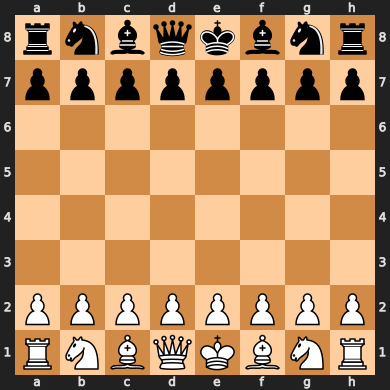

In [274]:
environment = Environment(max_num_moves=200,)
environment.reset()
#random.seed(42)
#np.random.seed(42)
#torch.manual_seed(42)

In [430]:
board = environment.get_board()

action = agent.select_action(environment, eps=0., greedy=False)
move = agent.action_to_move(action)

board_next, (reward, done) = environment.step(move)

state = agent.board_logic.board_to_state(board).to(config.device)

Q1 = agent.online_net1(state).detach()
Q2 = agent.online_net2(state).detach()
legal_moves = environment.get_legal_moves()
mask_legal = agent.get_mask_legal(legal_moves)

Q1_legal = Q1[mask_legal]
Q2_legal = Q2[mask_legal]

diff = torch.abs(Q1_legal - Q2_legal)/torch.max(torch.abs(Q1_legal), torch.abs(Q2_legal))

#print(Q1_legal)
#print(Q2_legal)

print(f"{np.mean(diff.cpu().numpy()):.4f}")

Q_legal = Q1.masked_fill(~mask_legal, -1e9)
action_star = torch.argmax(Q_legal, dim=1).to(config.device)
score = Q2[0,action_star[0]]

if not environment.mirror:
    print("Black:")
    print(f"score: {score.item():.4f}")
    print(board_next)
else:
    print("White:")
    print(f"score: {score.item():.4f}")
    print(board_next.mirror())


if board.is_checkmate():
    print("checkmate!")

AssertionError: push() expects move to be pseudo-legal, but got a8a7 in 6Q1/8/8/8/r6p/2N2k2/7P/2BK1R2

In [ ]:
state, action, next_state, mask_legal, reward, done = model.memory_pos.sample()

In [ ]:
model.memory_neg.rewards[:500]

tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-

In [ ]:
def flip_move(move: chess.Move) -> chess.Move:
    """Flips a chess.Move object to correspond to a mirrored board."""
    from_square_flipped = chess.square_mirror(move.from_square)
    to_square_flipped = chess.square_mirror(move.to_square)
    
    # Promotion piece type doesn't change when mirroring the board
    # (e.g., a queen is still a queen, just on a mirrored square).
    return chess.Move(from_square_flipped, to_square_flipped, move.promotion)

In [ ]:
move = chess.Move.from_uci("e2e4q")

In [ ]:
flip_move(move)

Move.from_uci('e7e5q')

In [ ]:
def get_board(ost):
    return 1 if not ost else 2

In [ ]:
get_board(False)

1